Name Aiden Heath-London

Labpartner(s)

In [18]:
# import statements go here
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Optional: Cartopy (some LSU lab images may not include it)
try:
    import cartopy.crs as ccrs   # map projections
    import cartopy.feature as cfeature  # coastlines/land/etc.
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    CARTOPY_AVAILABLE = True
except ModuleNotFoundError:
    CARTOPY_AVAILABLE = False
    print("Cartopy not installed — Cartopy plots will be skipped (matplotlib plots still work).")


Cartopy not installed — Cartopy plots will be skipped (matplotlib plots still work).


**For today's lab you need to install the package cartopy**

In [ ]:
# For this lab, Cartopy is OPTIONAL.
# On LSU lab computers, installing packages may be blocked.
# If Cartopy is not available, the lab still completes using the matplotlib plots.
#
# If you are allowed to install packages, try ONE of these:
# !pip install cartopy
# conda install -c conda-forge cartopy


In [19]:
# Cartopy imports are handled in the main imports cell above.
# If CARTOPY_AVAILABLE is False, Cartopy plots will be skipped automatically.
print("CARTOPY_AVAILABLE =", CARTOPY_AVAILABLE)

CARTOPY_AVAILABLE = False


# Class 6.2

Today we will finish fiunction sharing and do more plotting

# Warmups 6.2

**W.1** (From Zach) Write some code that generates 15 random integers from 1-100. If the integers are divisible by 2 assign them to list "x" if they are divisible by three, assign them to list "y", if they are neither assign them to list "z". 

In [3]:
# W.1
import numpy as np

rng = np.random.default_rng(42)  # fixed seed for reproducibility; remove/change if you want
nums = rng.integers(1, 101, size=15)

x = []  # divisible by 2
y = []  # divisible by 3
z = []  # neither divisible by 2 nor 3

for n in nums:
    if n % 2 == 0:
        x.append(int(n))
    elif n % 3 == 0:
        y.append(int(n))
    else:
        z.append(int(n))

nums, x, y, z


(array([ 9, 78, 66, 44, 44, 86,  9, 70, 21, 10, 53, 98, 74, 77, 72]),
 [78, 66, 44, 44, 86, 70, 10, 98, 74, 72],
 [9, 9, 21],
 [53, 77])

**W.2** Plot your lists together in some sensible way. Zach suggests a histogram with different colors for each list

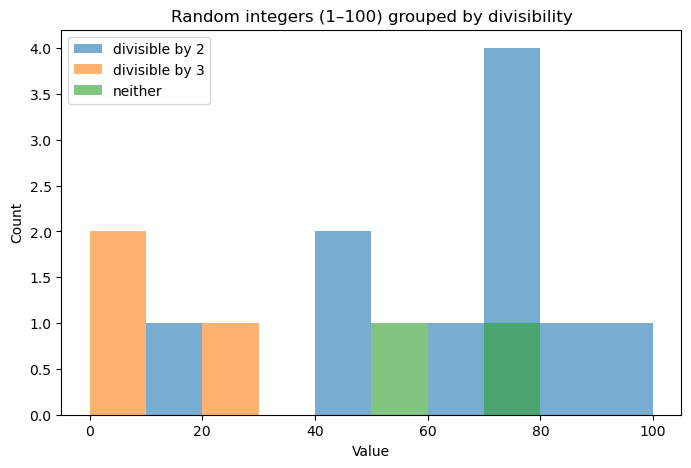

In [4]:
# W.2 Histogram of the three lists
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
# bins from 0..100 by 10s
bins = np.arange(0, 110, 10)

plt.hist(x, bins=bins, alpha=0.6, label='divisible by 2')
plt.hist(y, bins=bins, alpha=0.6, label='divisible by 3')
plt.hist(z, bins=bins, alpha=0.6, label='neither')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Random integers (1–100) grouped by divisibility')
plt.legend()
plt.show()


# Lecture 6.2

### Agenda:

- Show us your functions
- Questions
- xarray package and plotting netcdf files


### Show us your functions (from Lab 5.2) - continued

### Questions

In [20]:
if CARTOPY_AVAILABLE:
    # Questions (write yours here)
    # - What does "projection" mean in cartopy?
    # - Why do we need transform=ccrs.PlateCarree() when plotting lon/lat gridded data?
    #
    # Notes:
    # - projection controls how the spherical Earth is drawn on a flat map.
    # - transform tells cartopy what CRS your input data are in (usually lon/lat = PlateCarree),
    #   so it can reproject them into the axes projection correctly. else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


### Cartopy

Let's take the data we used last time and make the plot publication ready

There are a number of differnt map projections available in Cartopy.  https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

In [21]:
if CARTOPY_AVAILABLE:
    # plot a basic map with no data
    plt.figure(figsize=(7, 5))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines(resolution='110m')
    ax.gridlines()
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


Cartopy not available in this environment — skipping Cartopy cell.


In [22]:
if CARTOPY_AVAILABLE:
    # plot a basic map with no data, rotated
    plt.figure(figsize=(7, 5))
    ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the map to 203 degrees East
    ax.coastlines(resolution='110m')
    ax.gridlines()
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


Cartopy not available in this environment — skipping Cartopy cell.


In [23]:
if CARTOPY_AVAILABLE:
    # plot a basic map with no data, rotated
    plt.figure(figsize=(7, 5))
    ax = plt.axes(projection=ccrs.Robinson(central_longitude = 300))
    ax.coastlines(resolution='110m')
    ax.gridlines()
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


Cartopy not available in this environment — skipping Cartopy cell.


In [ ]:
if CARTOPY_AVAILABLE:
    # plot a basic map with no data
    plt.figure(figsize=(7, 5))
    ax = plt.axes(projection=ccrs.Mercator()) # different map projection
    ax.coastlines(resolution='110m')
    ax.gridlines(draw_labels=True)
    # note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


In [ ]:
if CARTOPY_AVAILABLE:
    # plot a basic map with no data
    plt.figure(figsize=(7, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='110m')
    ax.gridlines(draw_labels=True)
    
    # -60 (60 W) is the same as 300 E (360 degrees in total 360-60W = 300E)
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


How do I zoom in?

In [24]:
if CARTOPY_AVAILABLE:
    # let's zoom in to S Asia (example extent)
    # set_extent([west_lon, east_lon, south_lat, north_lat], crs=...)
    plt.figure(figsize=(7, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([60, 110, 0, 35], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='110m')
    ax.gridlines(draw_labels=True)
    plt.title('Zoomed view: South Asia')
    plt.show()
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


Cartopy not available in this environment — skipping Cartopy cell.


**Moving back to the Gulf of Mexico, we want to set the lat and lon range to match our HYCOM data. How do we find this?**

In [ ]:
# LOCAL FILE REQUIRED (LSU-friendly)
# Put the HYCOM NetCDF file in the SAME folder as this notebook, or paste the full path.
#
# Example file name (as used in lecture):
file = "020_archv.2001_001_01_2d.nc"

# Example full path (Windows):
# file = r"C:\Users\YOUR_USERNAME\Downloads\020_archv.2001_001_01_2d.nc"


In [26]:
# Open the dataset (local file)
try:
    gom_data = xr.open_dataset(file, decode_times=False)
except FileNotFoundError as e:
    raise FileNotFoundError(
        "Could not find the NetCDF file. Make sure the .nc file is in the same folder as this notebook "
        "OR set `file` to the full path.\n\n"
        f"Current file value: {file}"
    ) 

gom_data

NameError: name 'file' is not defined

In [ ]:
gom_data

In [ ]:
# Pick coordinate names + a variable to plot (robust)
def pick_name(ds, candidates):
    for name in candidates:
        if name in ds.coords or name in ds.variables:
            return name
    return None

lat_name = pick_name(gom_data, ["Latitude", "lat", "LATITUDE", "y"])
lon_name = pick_name(gom_data, ["Longitude", "lon", "LONGITUDE", "x"])

if lat_name is None or lon_name is None:
    raise KeyError(f"Could not find lat/lon coords. Available coords: {list(gom_data.coords)}")

# choose a 'sea surface height' variable if present
var_name = None
for cand in ["surf_el", "ssh", "zeta", "eta"]:
    if cand in gom_data.data_vars:
        var_name = cand
        break
if var_name is None:
    var_name = list(gom_data.data_vars)[0]

ssh_data = gom_data[var_name]
print("lat_name:", lat_name)
print("lon_name:", lon_name)
print("var_name:", var_name)

ssh_data


In [ ]:
float(gom_data[lat_name].min())

In [ ]:
float(gom_data[lat_name].max())

In [ ]:
float(gom_data[lon_name].max())

In [ ]:
float(gom_data[lon_name].min())

In [ ]:
# Base map matching HYCOM domain (Cartopy if available; otherwise matplotlib fallback)
lon_min = float(gom_data[lon_name].min())
lon_max = float(gom_data[lon_name].max())
lat_min = float(gom_data[lat_name].min())
lat_max = float(gom_data[lat_name].max())

if CARTOPY_AVAILABLE:
    plt.figure(figsize=(10,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.coastlines(resolution="110m")
    ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
    plt.title("HYCOM Gulf of Mexico domain (base map)")
    plt.show()
else:
    print("Cartopy not available — base map skipped (will still plot data with matplotlib).")


Now let's add some data

In [ ]:
# What does our data look like again? Pick a variable to plot.
# Common HYCOM 2D vars include: surf_el (surface elevation), ssh, water_u, water_v, water_temp (sometimes).
gom_data.data_vars


In [ ]:
# Plot SSH data on the map (Cartopy if available; otherwise matplotlib)
ssh0 = ssh_data.isel(time=0) if "time" in ssh_data.dims else ssh_data

plt.figure(figsize=(10,8))

if CARTOPY_AVAILABLE:
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    cf = ax.contourf(gom_data[lon_name], gom_data[lat_name], ssh0,
                     transform=ccrs.PlateCarree(), levels=25)
    ax.coastlines(resolution="110m")
    ax.add_feature(cfeature.BORDERS)
    plt.colorbar(cf, ax=ax, label=var_name)
    plt.title("HYCOM Sea Surface Height (Cartopy)")
    plt.show()
else:
    cf = plt.contourf(gom_data[lon_name], gom_data[lat_name], ssh0, levels=25)
    plt.colorbar(cf, label=var_name)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("HYCOM Sea Surface Height (matplotlib)")
    plt.show()


Now I'm going to take a bunch of features from Victoria's demo (in github as Hycom-CartopyDemo) and add them in to make a publication ready plot

In [ ]:
if CARTOPY_AVAILABLE:
    # A more "publication-ready" version with extra map features
    ssh_var = 'surf_el' if 'surf_el' in gom_data.data_vars else list(gom_data.data_vars)[0]
    ssh_data = gom_data[ssh_var]
    
    lat_name = 'Latitude' if 'Latitude' in ssh_data.coords else 'lat'
    lon_name = 'Longitude' if 'Longitude' in ssh_data.coords else 'lon'
    
    x = ssh_data[lon_name]
    y = ssh_data[lat_name]
    var = ssh_data.isel(time=0)
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([float(x.min()), float(x.max()), float(y.min()), float(y.max())], crs=ccrs.PlateCarree())
    
    # Features
    ax.add_feature(cfeature.LAND, zorder=0)
    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS, linewidth=0.5)
    
    gl = ax.gridlines(draw_labels=True, linewidth=0.4, alpha=0.6, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Data
    cf = ax.contourf(x, y, var, transform=ccrs.PlateCarree(), levels=40)
    cs = ax.contour(x, y, var, transform=ccrs.PlateCarree(), levels=12, linewidths=0.4)
    
    cbar = plt.colorbar(cf, ax=ax, shrink=0.8, pad=0.02)
    cbar.set_label(f'{ssh_var} (model units)')
    plt.title(f'HYCOM {ssh_var} (time index 0) with cartopy features')
    plt.show()
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


## Lab 6.2

**E.0** Finish Lab 6.1 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 3-4. Let me know if this feels like a good pace

In [14]:
# E.1
# Completed DataCamp: Introduction to Data Visualization with Matplotlib Chapters 3-4


**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

In [29]:
print("""
Matplotlib Commands:
- plt.figure()
- plt.plot()
- plt.hist()
- plt.contourf()
- plt.colorbar()
- plt.xlabel(), plt.ylabel(), plt.title()

Xarray Commands:
- xr.open_dataset()
- ds.data_vars
- da.isel()
- da.sel()
- da.plot()

Cartopy Commands:
- ccrs.PlateCarree()
- ax.set_extent()
- ax.coastlines()
- ax.add_feature()
""")


Matplotlib Commands:
- plt.figure()
- plt.plot()
- plt.hist()
- plt.contourf()
- plt.colorbar()
- plt.xlabel(), plt.ylabel(), plt.title()

Xarray Commands:
- xr.open_dataset()
- ds.data_vars
- da.isel()
- da.sel()
- da.plot()

Cartopy Commands:
- ccrs.PlateCarree()
- ax.set_extent()
- ax.coastlines()
- ax.add_feature()



**E.3** Make a plot of a different variable for the HYCOM data. Play around with colormaps and contourlines to make it your own. Post your plot on the class slack #random channel

In [30]:
if CARTOPY_AVAILABLE:
    # E.3 Plot a different HYCOM variable (example: surface u-velocity if present)
    # Play with colormaps and contour lines.
    
    # Pick a variable (change this to something you see in gom_data.data_vars)
    # Common options might include: 'water_u', 'water_v', 'salinity', 'water_temp' depending on file.
    candidates = ['water_u', 'water_v', 'salinity', 'water_temp', 'temperature', 'surf_el']
    varname = None
    for c in candidates:
        if c in gom_data.data_vars:
            varname = c
            break
    if varname is None:
        varname = list(gom_data.data_vars)[0]
    
    da = gom_data[varname].isel(time=0)
    
    lat_name = 'Latitude' if 'Latitude' in da.coords else 'lat'
    lon_name = 'Longitude' if 'Longitude' in da.coords else 'lon'
    lon = da[lon_name]
    lat = da[lat_name]
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([float(lon.min()), float(lon.max()), float(lat.min()), float(lat.max())], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.LAND, zorder=0)
    
    cf = ax.contourf(lon, lat, da, transform=ccrs.PlateCarree(), levels=40)
    cs = ax.contour(lon, lat, da, transform=ccrs.PlateCarree(), levels=10, linewidths=0.4)
    
    plt.colorbar(cf, ax=ax, shrink=0.8, pad=0.02, label=f'{varname} (model units)')
    plt.title(f'HYCOM variable: {varname} (time index 0)')
    plt.show()
    
    # Screenshot this plot and post it in Slack #random (per instructions).
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


Cartopy not available in this environment — skipping Cartopy cell.


### This week's project:

**E.4** Download some data from the ISIMIP data archive (https://data.isimip.org/) and plot it using cartopy. ISIMIP provides bias-corrected data for past and future climate simulations used for impacts studies world wide. Let's start with some maximum atmospheric surface temperature data in the historical period (1850-2014 for CMIP6). We want climate forcing data for ISIMIP3b, which are the lastest (CMIP6) climate projections. 

* https://data.isimip.org/search/tree/ISIMIP3b/InputData/climate/
* Click atmopsheric forcing
* Click GFDL... This is one of NOAA-GFDL's climate models (ESM4)
* Click historical

All of the variable names are in CMIP lingo. Sadly, there is no easy cheat sheet. But you want tas, which is "temperature of air at surface". Let's use the tasmax, the maximum daily surface air temperature
* Click tasmax
* Click files to see all the available files.
  
Here you have a choice, you can download an etire file (note the size) or you can use the "configure download" button, which has subsetting by space or country, as well as time opitons. You can click on a file name to see more info.
* Click on "download file" for the 1851-1860 file. Just grab the whole file, it will take a minute to download.
* Load up the data into xarray and plot the maximum of this dataset (so max over the decade for each gridcell. You just use a max function for this, no loops needed).
* Plot using cartopy to make it pretty. Put some sensible lables on it, etc. Maybe add some country boundaries.

In [31]:
if CARTOPY_AVAILABLE:
    # E.4 ISIMIP historical tasmax (1850-1859 example) using cartopy
    # NOTE: ISIMIP data are large. The easiest workflow is:
    # 1) Download the NetCDF file(s) from https://data.isimip.org/ in your browser.
    # 2) Put them in the same folder as this notebook.
    # 3) Point `hist_file` to the downloaded file.
    
    import xarray as xr
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    
    # TODO: replace with your downloaded file path (example filename only!)
    hist_file = 'tasmax_global_daily_GFDL-ESM4_historical_1850_1859.nc'  # <-- edit me
    ds_hist = xr.open_dataset(hist_file)
    
    # Guess the tasmax variable name
    tasmax_name = 'tasmax' if 'tasmax' in ds_hist.data_vars else list(ds_hist.data_vars)[0]
    tasmax_hist = ds_hist[tasmax_name]
    
    # Calculate max at each gridpoint over the decade
    tasmax_hist_max = tasmax_hist.max(dim='time')
    
    # Determine lat/lon coordinate names
    lat_name = 'lat' if 'lat' in tasmax_hist_max.coords else 'latitude'
    lon_name = 'lon' if 'lon' in tasmax_hist_max.coords else 'longitude'
    lon = tasmax_hist_max[lon_name]
    lat = tasmax_hist_max[lat_name]
    
    fig = plt.figure(figsize=(11,6))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    ax.add_feature(cfeature.LAND, zorder=0, alpha=0.6)
    ax.add_feature(cfeature.BORDERS, linewidth=0.4)
    
    # ISIMIP lon could be 0..360 or -180..180; pcolormesh handles both if coords are correct.
    pm = ax.pcolormesh(lon, lat, tasmax_hist_max, transform=ccrs.PlateCarree())
    cbar = plt.colorbar(pm, ax=ax, shrink=0.8, pad=0.02)
    cbar.set_label('Max daily tasmax (K unless converted)')
    plt.title('ISIMIP historical tasmax (max over decade)')
    plt.show()
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


Cartopy not available in this environment — skipping Cartopy cell.


**E.5** Now make a second plot using ISIMP data for a future climate projection. Following the same steps as above, get the GFDL tasmax data for the future climate scenario SSP3-7.0 (higher emissions scenario) for 2051-2060. Again, calculate the maximum at each gridpoint for this data set. This is the future maximum daily temperature for that decade. Make your plot nice.

In [32]:
if CARTOPY_AVAILABLE:
    # E.5 ISIMIP future tasmax (SSP3-7.0, 2051-2060 example)
    # Same workflow: download file(s) locally from ISIMIP, then open here.
    
    fut_file = 'tasmax_global_daily_GFDL-ESM4_ssp370_2051_2060.nc'  # <-- edit me to your filename
    ds_fut = xr.open_dataset(fut_file)
    
    tasmax_name = 'tasmax' if 'tasmax' in ds_fut.data_vars else list(ds_fut.data_vars)[0]
    tasmax_fut = ds_fut[tasmax_name]
    
    tasmax_fut_max = tasmax_fut.max(dim='time')
    
    lat_name = 'lat' if 'lat' in tasmax_fut_max.coords else 'latitude'
    lon_name = 'lon' if 'lon' in tasmax_fut_max.coords else 'longitude'
    lon = tasmax_fut_max[lon_name]
    lat = tasmax_fut_max[lat_name]
    
    fig = plt.figure(figsize=(11,6))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    ax.add_feature(cfeature.LAND, zorder=0, alpha=0.6)
    ax.add_feature(cfeature.BORDERS, linewidth=0.4)
    
    pm = ax.pcolormesh(lon, lat, tasmax_fut_max, transform=ccrs.PlateCarree())
    cbar = plt.colorbar(pm, ax=ax, shrink=0.8, pad=0.02)
    cbar.set_label('Max daily tasmax (K unless converted)')
    plt.title('ISIMIP SSP3-7.0 tasmax (max over decade 2051–2060)')
    plt.show()
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


Cartopy not available in this environment — skipping Cartopy cell.


**E.6** Now plot the anomaly between the two, 2050's - 1850's. Use a diverging colormap (light in the middle), centered on zero. What is the outlook for your country of orgin? Answer in full sentances with specific numbers.

In [33]:
if CARTOPY_AVAILABLE:
    # E.6 Plot anomaly (2050s max - 1850s max), centered on 0 with a diverging colormap
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from matplotlib.colors import TwoSlopeNorm
    
    # Ensure both fields are on the same grid
    # If not, you may need to regrid/interpolate. Assuming same model/grid for this lab:
    anom = tasmax_fut_max - tasmax_hist_max
    
    lat_name = 'lat' if 'lat' in anom.coords else 'latitude'
    lon_name = 'lon' if 'lon' in anom.coords else 'longitude'
    lon = anom[lon_name]
    lat = anom[lat_name]
    
    # Symmetric normalization around zero
    vmax = float(np.nanmax(np.abs(anom.values)))
    norm = TwoSlopeNorm(vmin=-vmax, vcenter=0.0, vmax=vmax)
    
    fig = plt.figure(figsize=(11,6))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    ax.add_feature(cfeature.LAND, zorder=0, alpha=0.6)
    ax.add_feature(cfeature.BORDERS, linewidth=0.4)
    
    pm = ax.pcolormesh(lon, lat, anom, transform=ccrs.PlateCarree(), norm=norm)
    cbar = plt.colorbar(pm, ax=ax, shrink=0.8, pad=0.02)
    cbar.set_label('Anomaly in max tasmax (future - historical)')
    plt.title("ISIMIP tasmax anomaly (2050s - 1850s)")
    plt.show()
    
    # Answer prompt (example template):
    # "For my country (_____): the anomaly ranges from about ___ to ___ K, with typical values ~___ K."
else:
    print('Cartopy not available in this environment — skipping Cartopy cell.')


Cartopy not available in this environment — skipping Cartopy cell.


**E.7** How could you potentially use this kind of data (future climate projections) in your research? Do some brainstorming. Write down your thoughts here.

In [34]:
# E.7 Brainstorming (write your thoughts in full sentences below)

text = """Future climate projections like ISIMIP could help my research by:
- Providing boundary conditions or forcing for coastal process models (e.g., runoff, storm intensity proxies).
- Estimating how extreme heat (tasmax) or precipitation might change, which affects coastal wetlands,
  water quality, and ecosystem stress.
- Identifying regions/times where thresholds are crossed (e.g., days above a temperature that harms species),
  which can inform restoration planning and prioritization.

Specific idea for Coastal Environmental Science:
- Use projected extremes + sea level rise scenarios to map future risk hotspots for coastal restoration sites,
  then compare to current monitoring data to validate vulnerability metrics.
"""

print(text)


Future climate projections like ISIMIP could help my research by:
- Providing boundary conditions or forcing for coastal process models (e.g., runoff, storm intensity proxies).
- Estimating how extreme heat (tasmax) or precipitation might change, which affects coastal wetlands,
  water quality, and ecosystem stress.
- Identifying regions/times where thresholds are crossed (e.g., days above a temperature that harms species),
  which can inform restoration planning and prioritization.

Specific idea for Coastal Environmental Science:
- Use projected extremes + sea level rise scenarios to map future risk hotspots for coastal restoration sites,
  then compare to current monitoring data to validate vulnerability metrics.

